# Data Cleaning 

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import datetime
import numpy as np

###  1 - Import and export dataset

In [2]:
dataframe_1 = pd.read_csv('cleaning_notebook_1.csv')

In [3]:
dataframe_1

,x0,x1,Dealer,Type
0,2,2.0,AA,Table
1,4,3.0,AA,Table
2,7,2.0,AA,Table
3,2,9.0,AA,Chair
4,2,8.0,AA,Chair
5,7,8.0,AA,Chair
6,6,NaN,AA,Table


In [4]:
dataframe_2 = pd.read_csv('cleaning_notebook_2.csv')

In [5]:
dataframe_2

,x0,x1,Dealer,Type
0,5,1,AA,Table
1,8,3,AA,Tab.
2,9,1,AA,Table
3,5,7,AA,Chair
4,6,9,AA,Chair
5,10,9,AA,Chair
6,20,40,AA,Dining
7,25,45,AA,Dining


### 2. Join and Append Tables

Useful Links:

1. [Append Tables](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.append.html)
2. [Merge, Join and Concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [6]:
# 'ignore_index' is used for reset the index by not using index from the file being appended
input_data = dataframe_1.append(dataframe_2, ignore_index=True)

In [7]:
input_data

,x0,x1,Dealer,Type
0,2,2.0,AA,Table
1,4,3.0,AA,Table
2,7,2.0,AA,Table
3,2,9.0,AA,Chair
4,2,8.0,AA,Chair
5,7,8.0,AA,Chair
6,6,NaN,AA,Table
7,5,1.0,AA,Table
8,8,3.0,AA,Tab.
9,9,1.0,AA,Table


### 3. Renaming Variables

'x0' and 'x1' does not make any sense and will not help you in future analysis. Rename 'x0' and 'x1' to 'length' and 'breadth'

In [8]:
input_data.rename(columns={'x0': 'length', 'x1': 'breadth'}, inplace=True)

In [9]:
input_data

,length,breadth,Dealer,Type
0,2,2.0,AA,Table
1,4,3.0,AA,Table
2,7,2.0,AA,Table
3,2,9.0,AA,Chair
4,2,8.0,AA,Chair
5,7,8.0,AA,Chair
6,6,NaN,AA,Table
7,5,1.0,AA,Table
8,8,3.0,AA,Tab.
9,9,1.0,AA,Table


In [10]:
input_data['Type'].value_counts()

Table     6
Chair     6
Dining    2
Tab.      1
Name: Type, dtype: int64

In [11]:
input_data["Type"] = input_data["Type"].replace("Tab.", "Table")

In [12]:
input_data

,length,breadth,Dealer,Type
0,2,2.0,AA,Table
1,4,3.0,AA,Table
2,7,2.0,AA,Table
3,2,9.0,AA,Chair
4,2,8.0,AA,Chair
5,7,8.0,AA,Chair
6,6,NaN,AA,Table
7,5,1.0,AA,Table
8,8,3.0,AA,Table
9,9,1.0,AA,Table


### 4. Selecting columns 

In [13]:
selected_data = input_data.drop(['Dealer'], axis=1)

In [14]:
selected_data

,length,breadth,Type
0,2,2.0,Table
1,4,3.0,Table
2,7,2.0,Table
3,2,9.0,Chair
4,2,8.0,Chair
5,7,8.0,Chair
6,6,NaN,Table
7,5,1.0,Table
8,8,3.0,Table
9,9,1.0,Table


### 5. Filter rows

In [15]:
filtered_data = selected_data.drop(selected_data[selected_data.Type == 'Dining'].index)

In [16]:
filtered_data

,length,breadth,Type
0,2,2.0,Table
1,4,3.0,Table
2,7,2.0,Table
3,2,9.0,Chair
4,2,8.0,Chair
5,7,8.0,Chair
6,6,NaN,Table
7,5,1.0,Table
8,8,3.0,Table
9,9,1.0,Table


### 6. Missing Values

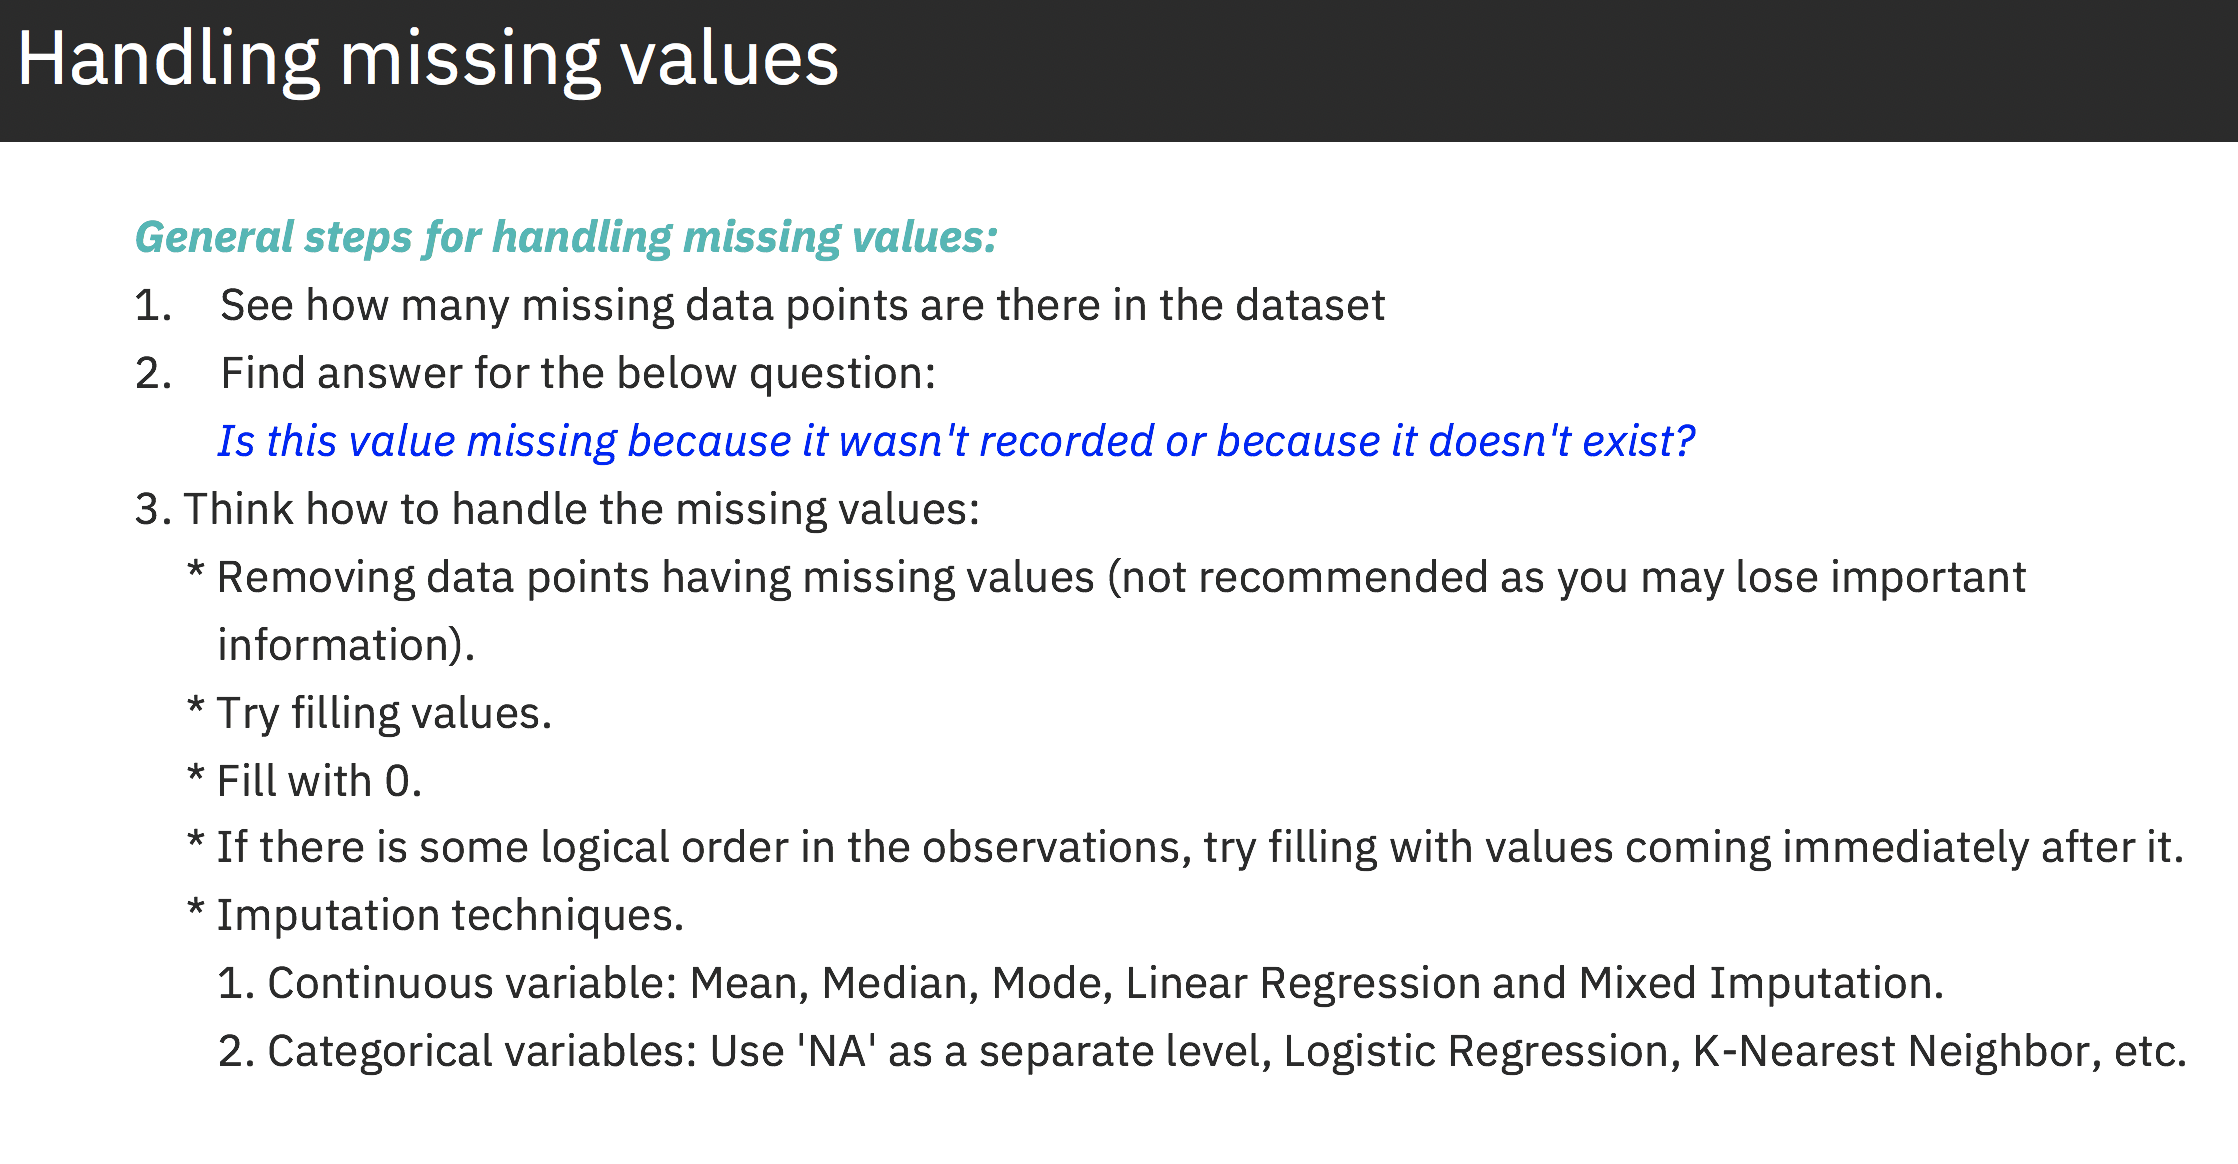

##### General steps for handling missing values:
    1. See how many missing data points are there in the dataset
    2. Find answer for the below question:
        * Is this value missing becuase it wasn't recorded or becuase it dosen't exist?
    3. Think how to handle the missing values:
        * Removing data points having missing values (not recommended as you may lose important information).
        * Try filling values.
          * Fill with 0.
          * If there is some logical order in the observations, try filling with values coming 
            immediately after it.
          * Imputation techniques.
            1. Continous variable: Mean, Median, Mode, Linear Regression and Mixed Imputation.
            2. Categorical variables: Use 'NA' as a seperate level, Logistic Regression, K-Nearest Neighbor, etc.

In [17]:
#check for any missing values
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 3 columns):
length     13 non-null int64
breadth    12 non-null float64
Type       13 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ bytes


In [55]:
#from the description, breadth seems to have a 'Null' value.
remove_null_data = filtered_data.dropna(subset=["breadth"])

In [56]:
remove_null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 12
Data columns (total 3 columns):
length     12 non-null int64
breadth    12 non-null float64
Type       12 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 384.0+ bytes


### 8. Changing the type of variable

In [57]:
remove_null_data.breadth = remove_null_data.breadth.astype(int)

/Users/saishruthi.tn@ibm.com/anaconda3/envs/cp/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [58]:
remove_null_data

,length,breadth,Type
0,2,2,Table
1,4,3,Table
2,7,2,Table
3,2,9,Chair
4,2,8,Chair
5,7,8,Chair
7,5,1,Table
8,8,3,Table
9,9,1,Table
10,5,7,Chair


### 7. Summarize

In [59]:
remove_null_data.describe(include='all')

,length,breadth,Type
count,12.000000,12.000000,12
unique,NaN,NaN,2
top,NaN,NaN,Table
freq,NaN,NaN,6
mean,5.583333,5.166667,NaN
std,2.745520,3.406767,NaN
min,2.000000,1.000000,NaN
25%,3.500000,2.000000,NaN
50%,5.500000,5.000000,NaN
75%,7.250000,8.250000,NaN


### 8. String to Number

Most of the ML algorithms are better in understanding the numbers than string values. Therefore, data in string need to be converted into numbers. There 
two common types of encoding,
1. Label encoding
2. One-hot encoding

In [63]:
data_label_encoded = remove_null_data.copy(deep=True)

In [64]:
#Label Encoding
labelencoder = LabelEncoder()

In [65]:
data_label_encoded['Type'] = labelencoder.fit_transform(data_label_encoded['Type'])
labelencoder_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(labelencoder_name_mapping)

{'Chair': 0, 'Table': 1}


In [67]:
data_label_encoded

,length,breadth,Type
0,2,2,1
1,4,3,1
2,7,2,1
3,2,9,0
4,2,8,0
5,7,8,0
7,5,1,1
8,8,3,1
9,9,1,1
10,5,7,0


In [69]:
#One-hot encoding
data_one_hot_encoded = data_label_encoded.copy(deep=True)
onehotencoder = OneHotEncoder(categorical_features = [2])
data_one_hot_encoded = onehotencoder.fit_transform(data_one_hot_encoded).toarray()

In [70]:
data_one_hot_encoded

array([[ 0.,  1.,  2.,  2.],
       [ 0.,  1.,  4.,  3.],
       [ 0.,  1.,  7.,  2.],
       [ 1.,  0.,  2.,  9.],
       [ 1.,  0.,  2.,  8.],
       [ 1.,  0.,  7.,  8.],
       [ 0.,  1.,  5.,  1.],
       [ 0.,  1.,  8.,  3.],
       [ 0.,  1.,  9.,  1.],
       [ 1.,  0.,  5.,  7.],
       [ 1.,  0.,  6.,  9.],
       [ 1.,  0., 10.,  9.]])

### DateTime format

In [ ]:
#Format of the date is month/day/year

In [75]:
date_data = {'date': ['3/2/07','3/22/07','4/6/07','4/14/07','4/15/07']}

In [76]:
date_df = pd.DataFrame(data=date_data)

In [77]:
date_df

,date
0,3/2/07
1,3/22/07
2,4/6/07
3,4/14/07
4,4/15/07


In [79]:
date_df['date'].dtype

dtype('O')

Since the column in recognized as Object rather than date, we need to convert the column into date type.
Libary used for this is 'datetime'. This process is called *Parsing date*. As we are taking a date string and identifying its components.

In [82]:
date_df['date_parsed'] = pd.to_datetime(date_df['date'], format = "%m/%d/%y")

In [87]:
date_df

,date,date_parsed
0,3/2/07,2007-03-02
1,3/22/07,2007-03-22
2,4/6/07,2007-04-06
3,4/14/07,2007-04-14
4,4/15/07,2007-04-15


In [85]:
date_df['date_parsed'].dtype

dtype('<M8[ns]')

In [90]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

The column has been converted into date time type. Now, it is easy to retrieve the components such as day, month and year from the date. 

In [91]:
day = date_df['date_parsed'].dt.day

In [92]:
day

0     2
1    22
2     6
3    14
4    15
Name: date_parsed, dtype: int64